In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [2]:
data = pd.read_csv('bank-full.csv', sep=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.shape

(45211, 17)

In [7]:
columns = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

In [8]:
df = data[columns]

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [11]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df['y']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27344\3436377633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'no': 0, 'yes': 1})


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [12]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

del df_train['y']
del df_val['y']
del df_test['y']

In [14]:
len(y_train), len(y_val), len(y_test)

(27126, 9042, 9043)

In [15]:
print(len(df_train), len(df_val), len(df_test))

27126 9042 9043


In [16]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Q 1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.2+ MB


In [18]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('y')

In [19]:
auc_scores = []

for feature in numerical_features:
    score = roc_auc_score(y_train, df_train[feature])
    if score >= 0.5:
        auc_scores.append((feature, score))
    else:
        auc_scores.append((feature, roc_auc_score(y_train, - df_train[feature])))
        
auc_scores.sort(key=lambda x: x[1], reverse=True)
auc_scores

[('duration', 0.8147002759670778),
 ('previous', 0.5985653242764153),
 ('pdays', 0.5901276247352144),
 ('balance', 0.5888313805382317),
 ('campaign', 0.5714543015682159),
 ('day', 0.525957882383908),
 ('age', 0.512185717527344)]

# Q 2

In [20]:
def question2_answer(df_train, y_train, df_val, y_val):

    dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dicts = df_val.to_dict(orient='records')

    X_val = dv.transform(val_dicts)
    y_pred = model.predict_proba(X_val)[:, 1]

    return round(roc_auc_score(y_val, y_pred), 3)

In [21]:
question2_answer(df_train, y_train, df_val, y_val)

0.9

# Q 3

In [22]:
def question3_answer(df_train, y_train, df_val, y_val):

    dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dicts = df_val.to_dict(orient='records')

    X_val = dv.transform(val_dicts)
    y_pred = model.predict_proba(X_val)[:, 1]

    thresholds = np.linspace(0, 1, 101)
    scores = []

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)


    for t in thresholds:

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, tn, fp, fn))

    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
    df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])

    plt.plot(df_scores['threshold'], df_scores['precision'], label='precision')
    plt.plot(df_scores['threshold'], df_scores['recall'], label='recall')
    plt.legend()

    equality = df_scores.query('precision == recall')

    return equality

,threshold,tp,tn,fp,fn,precision,recall


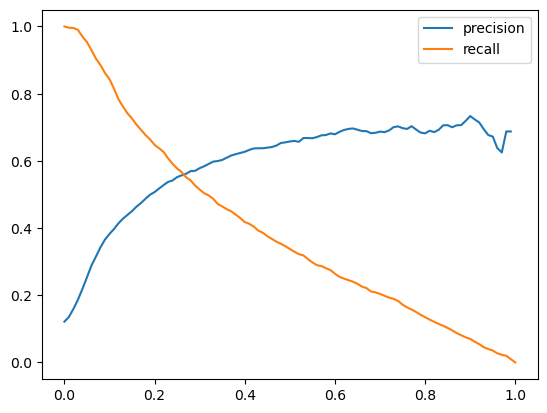

In [23]:
question3_answer(df_train, y_train, df_val, y_val)

# Q 4

In [24]:
def question4_answer(df_train, y_train, df_val, y_val):

    dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dicts = df_val.to_dict(orient='records')

    X_val = dv.transform(val_dicts)
    y_pred = model.predict_proba(X_val)[:, 1]

    thresholds = np.linspace(0, 1, 101)
    scores = []

    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)


    for t in thresholds:

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, tn, fp, fn))

    columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
    df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['f1'] = 2 * df_scores['precision'] * df_scores['recall'] / (df_scores['precision'] + df_scores['recall'])

    max_f1 = max(df_scores['f1'])

    return df_scores.query('f1 == @max_f1')['threshold']

In [25]:
question4_answer(df_train, y_train, df_val, y_val)

22    0.22
Name: threshold, dtype: float64

# Q 5

In [26]:
def question5_answer(df_full_train):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['y'].values
        y_val = df_val['y'].values
        
        del df_train['y']
        del df_val['y']

        dicts = df_train.to_dict(orient='records')
        dv = DictVectorizer(sparse=False)

        X_train = dv.fit_transform(dicts)

        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
        model.fit(X_train, y_train)

        val_dicts = df_val.to_dict(orient='records')

        X_val = dv.transform(val_dicts)
        y_pred = model.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    return np.std(scores)

In [27]:
question5_answer(df_full_train)

0.0053151357572693

# Q 6

In [28]:
C = [0.000001, 0.001, 1]

In [29]:
def question6_answer(df_full_train, C):

    answer = []

    for C in tqdm(C):
        kfold = KFold(n_splits=5, shuffle=True, random_state=1)
        scores = []

        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train['y'].values
            y_val = df_val['y'].values
            
            del df_train['y']
            del df_val['y']

            dicts = df_train.to_dict(orient='records')
            dv = DictVectorizer(sparse=False)

            X_train = dv.fit_transform(dicts)

            model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
            model.fit(X_train, y_train)

            val_dicts = df_val.to_dict(orient='records')

            X_val = dv.transform(val_dicts)
            y_pred = model.predict_proba(X_val)[:, 1]

            auc = roc_auc_score(y_val, y_pred)

            scores.append(auc)

        print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

        answer.append((C, round(np.mean(scores), 3), round(np.std(scores), 3)))

    columns = ['C', 'mean', 'std']
    df_scores = pd.DataFrame(answer, columns=columns)

    display(df_scores)
    max_mean = max(df_scores['mean'])

    return df_scores.query('mean == @max_mean')['C']

In [30]:
question6_answer(df_full_train, C)

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.701 +- 0.009
C=0.001 0.861 +- 0.007
C=1 0.906 +- 0.005


,C,mean,std
0,0.000001,0.701,0.009
1,0.001000,0.861,0.007
2,1.000000,0.906,0.005


2    1.0
Name: C, dtype: float64